<a href="https://colab.research.google.com/github/suyash456/Image-Denoising/blob/main/Image_Denoising_using_Dictionary_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, util, restoration
from sklearn.feature_extraction import image
from sklearn.decomposition import MiniBatchDictionaryLearning

In [ ]:
image_path = '/content/flower_noisy.jpg'
noisy_image = io.imread(image_path)
noisy_image = util.img_as_float(noisy_image)
print('Noise Image shape:',noisy_image.shape)

Noise Image shape: (321, 481, 3)


In [ ]:
# Extract small patches from the grayscale image
patch_size = (14, 14)
patches = image.extract_patches_2d(noisy_image, patch_size)
print('Number of Patches :',patches.shape[0])
print('Shape of patches:',patches.shape)
# Reshape the patches for dictionary learning
data = patches.reshape(patches.shape[0], -1)
print('Shape of Input data :',data.shape)


Number of Patches : 144144
Shape of patches: (144144, 14, 14, 3)
Shape of Input data : (144144, 588)


In [ ]:
# Extract small patches from the grayscale image
patch_size = (7, 7)
patches = image.extract_patches_2d(noisy_image, patch_size)
print('Number of Patches :',patches.shape[0])
print('Shape of patches:',patches.shape)
# Reshape the patches for dictionary learning
data = patches.reshape(patches.shape[0], -1)
print('Shape of Input data :',data.shape)

Number of Patches : 149625
Shape of patches: (149625, 7, 7, 3)
Shape of Input data : (149625, 147)


In [ ]:
# Perform dictionary learning
n_components = 1000  # Number of dictionary atoms to learn
dl = MiniBatchDictionaryLearning(n_components=n_components, alpha=1.0, n_iter=10000)

In [ ]:
dl.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2290: FutureWarning: The default value of batch_size will change from 3 to 256 in 1.3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(


MiniBatchDictionaryLearning(alpha=1.0, n_components=1000, n_iter=10000)

In [ ]:
# Denoise the patches using the learned dictionary
denoised_patches = np.dot(dl.transform(data), dl.components_)
print('Shape of Output Denoised patches:',denoised_patches.shape)

Shape of Output Denoised patches: (149625, 147)


In [ ]:
# Reshape the denoised patches back to their original shape
denoised_patches = denoised_patches.reshape(patches.shape)
print('After Reshaping, Output Denoised patches:',denoised_patches.shape)

After Reshaping, Output Denoised patches: (149625, 7, 7, 3)


In [ ]:
# Reconstruct the denoised image from the patches
reconstructed_image = image.reconstruct_from_patches_2d(denoised_patches, noisy_image.shape)
print('reconstructed_image:',reconstructed_image.shape)

reconstructed_image: (321, 481, 3)


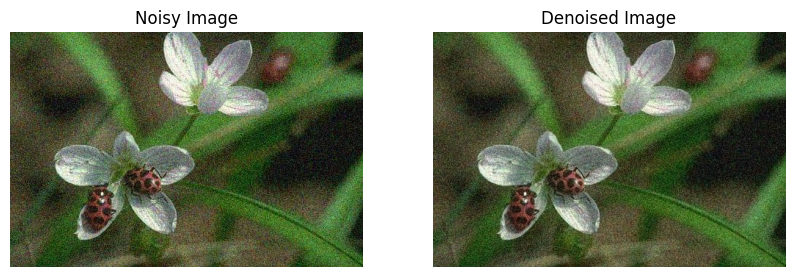

In [ ]:
# Show the original noisy image and the denoised image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image)
plt.title('Denoised Image')
plt.axis('off')
plt.show()